In [ ]:
%cd /content/drive/MyDrive/ColabNotebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!git clone https://github.com/abdallahdib/NextFace.git
import sys
import os

fatal: destination path 'NextFace' already exists and is not an empty directory.


In [ ]:
sys.path.insert(0,'/content/drive/MyDrive/ColabNotebooks/NextFace')

In [ ]:
!pip install --target=$nb_path face_alignment==1.2.0 redner-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.8 MB 1.2 MB/s 
  Created wheel for face-alignment: filename=face_alignment-1.2.0-py2.py3-none-any.whl size=30416 sha256=dc7191494cd7a404d1896fe8993608b1b3b7448f4ad279d1b23ae0ecd10bda38
  Stored in directory: /root/.cache/pip/wheels/fb/5c/32/7e8e12c48d01920bfb3c790907d12ede5f6ae3927eb73355af
Successfully built face-alignment


In [ ]:
!pip install --target=$nb_path mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.0 MB 96.5 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.11.23 which is incompatible.


In [ ]:
from optimizer import Optimizer
from config import Config
config = Config()
config.fillFromDicFile('/content/drive/MyDrive/ColabNotebooks/NextFace/optimConfig.ini')
config.device = 'cuda'
config.path = '/content/drive/MyDrive/ColabNotebooks/NextFace/baselMorphableModel/'

loading optim config from:  /content/drive/MyDrive/ColabNotebooks/NextFace/optimConfig.ini


In [ ]:
imagePath = '/content/drive/MyDrive/ColabNotebooks/NextFace/input/pose.jfif' #verify ur path
outputDir = '/content/drive/MyDrive/ColabNotebooks/NextFace/outputOptim/' + os.path.basename(imagePath.strip('/'))
optimizer = Optimizer(outputDir ,config)

Loading Basel Face Model 2017 from /content/drive/MyDrive/ColabNotebooks/NextFace/baselMorphableModel//morphableModel-2017.pickle...
loading mesh normals...
loading uv parametrization...
loading landmarks association file...
creating sampler...


init camera pose...
1/3 => Optimizing head pose and expressions using landmarks...


loading image from path:  /content/drive/MyDrive/ColabNotebooks/NextFace/input/pose.jfif
detecting landmarks using: mediapipe


100%|██████████| 2000/2000 [00:04<00:00, 408.44it/s]
2/3 => Optimizing shape, statistical albedos, expression, head pose and scene light...
100%|██████████| 401/401 [01:09<00:00,  5.81it/s]
3/3 => finetuning albedos, shape, expression, head pose and scene light...
100%|██████████| 101/101 [00:18<00:00,  5.60it/s]
took 1.54 minutes to optimize
saving to: ' /content/drive/MyDrive/ColabNotebooks/NextFace/outputOptim/pose.jfif/ '. hold on... 


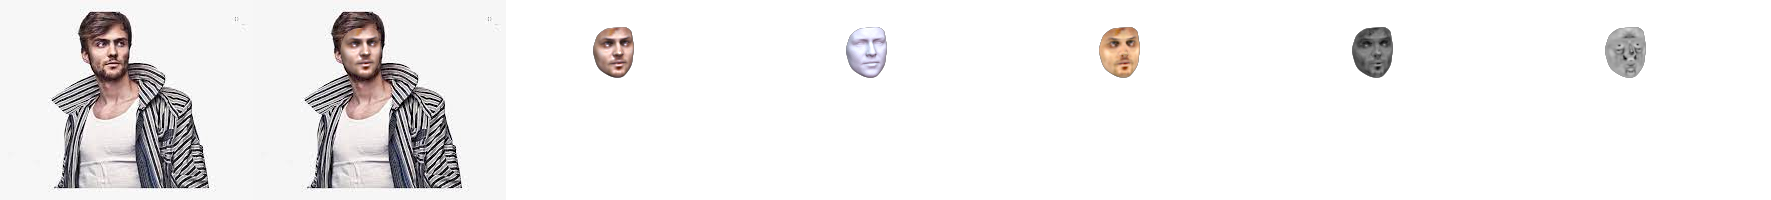

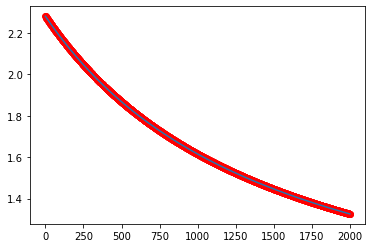

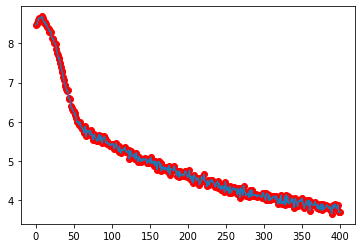

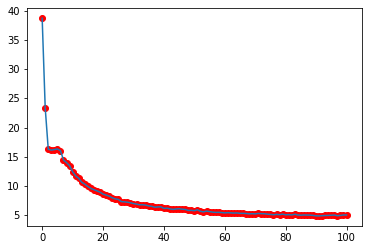

In [ ]:
#run the optimization now 
optimizer.run(imagePath)
#display results
from IPython.display import Image, display
from IPython.display import Image
display(Image(outputDir + '/render_0.png'))

In [ ]:
!python3 "/content/drive/MyDrive/ColabNotebooks/NextFace/replay.py" --input "/content/drive/MyDrive/ColabNotebooks/NextFace/outputOptim/pose.jfif/checkpoints/stage3_output.pickle" --output "/content/drive/MyDrive/ColabNotebooks/NextFace/resources" --config "/content/drive/MyDrive/ColabNotebooks/NextFace/optimConfig.ini"

loading optim config from:  /content/drive/MyDrive/ColabNotebooks/NextFace/optimConfig.ini
Loading Basel Face Model 2017 from /content/drive/MyDrive/ColabNotebooks/NextFace/baselMorphableModel/morphableModel-2017.pickle...
loading mesh normals...
loading uv parametrization...
loading landmarks association file...
creating sampler...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
animating reconstruction, this may take some time depending on the number of raytracing samples and ur gpu. please wait...
ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version

In [36]:
!pip install --target=$nb_path open3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 422.4 MB 6.5 kB/s 
     |████████████████████████████████| 3.2 MB 46.2 MB/s 
     |████████████████████████████████| 9.9 MB 1.5 MB/s 
     |████████████████████████████████| 75 kB 3.6 MB/s 
     |████████████████████████████████| 1.6 MB 51.3 MB/s 
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.7.0
    Uninstalling nbformat-5.7.0:
      Successfully uninstalled nbformat-5.7.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [1]:
import numpy as np
import open3d as o3d
import plotly.graph_objects as go

In [2]:
mesh = o3d.io.read_triangle_mesh("/content/drive/MyDrive/ColabNotebooks/NextFace/outputOptim/pose.jfif/mesh0.obj")
if mesh.is_empty(): exit()

In [3]:
triangles = np.asarray(mesh.triangles)
vertices = np.asarray(mesh.vertices)
colors = None
if mesh.has_triangle_normals():
    colors = (0.5, 0.5, 0.5) + np.asarray(mesh.triangle_normals) * 0.5
    colors = tuple(map(tuple, colors))
else:
    colors = (1.0, 0.0, 0.0)

In [4]:
fig = go.Figure(
    data=[
        go.Mesh3d(
            x=vertices[:,0],
            y=vertices[:,1],
            z=vertices[:,2],
            i=triangles[:,0],
            j=triangles[:,1],
            k=triangles[:,2],
            facecolor=colors,
            opacity=0.50)
    ],
    layout=dict(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        )
    )
)
fig.show()